In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Projeção em Subespaços Unidimensionais**

### **Exemplo 1**

Encontre a matriz de projeção $\textbf{P}_{\pi}$ na reta que passa pela origem gerado por $\textbf{b} = \begin{bmatrix}
1 & 2 & 2 \\
\end{bmatrix}^\top$, onde $\textit{b}$ é uma direção e uma base do subespaço unidimensional.

In [2]:
# Definindo o vetor b
b = np.array([1, 2, 2])
b

array([1, 2, 2])

A projeção $\textbf{P}_{\pi}$ será encontrada seguindo os seguintes passos:

 * Considere a Equação $\textbf{P}_{\pi} =
\frac{\textbf{b} \textbf{b}^{\top} }{\|\textbf{b}\|^2}$.



In [3]:
# Calculando bb^T
bbT = np.outer(b, b.T)
bbT

array([[1, 2, 2],
       [2, 4, 4],
       [2, 4, 4]])

* Calculando $\|\textbf{b}\|^2$.

In [4]:
# Calculando ||(b*b)||^2
n_b = np.linalg.norm(b)
bb_2 = n_b * n_b
bb_2

9.0

* Encontrando $\textbf{P}_{\pi}$.

In [5]:
# Calculando Pπ
P_pi = bbT / bb_2
P_pi

array([[0.11111111, 0.22222222, 0.22222222],
       [0.22222222, 0.44444444, 0.44444444],
       [0.22222222, 0.44444444, 0.44444444]])

### **Exemplo 2**

Em seguida, considere um vetor $\textbf{x}$, calcule  $\textbf{P}_{\pi}$$\textbf{x}$ e verifique se o resultado está no subespaço gerado por $\textbf{b}$.

* Considere $\textbf{x} = \begin{bmatrix}
1 & 1 & 1 \\
\end{bmatrix}^\top$. Neste caso,  deve-se calcular $\textbf{P}_{\pi}$ de $\textbf{x}$  sobre $\textbf{b}$ e verificar se o resultado é proporcional a $\textbf{b}$.



* Encontrando
$\pi_U(\textbf{x}) =
\textbf{P}_{\pi}
\textbf{x}$

In [6]:
# Definindo o vetor x
x = np.array([1, 1, 1])
x

array([1, 1, 1])

In [7]:
# Calculando Pπx
P_pi_x = np.dot(P_pi, x)
P_pi_x

array([0.55555556, 1.11111111, 1.11111111])

Para verificar se $\textbf{P}_{\pi}
\textbf{x}$ é um múltiplo escalar de $\textbf{b}$,   a projeção deve ser igual a $\lambda \times \textbf{b}$, onde $\lambda$ é algum escalar. Portanto, temos o seguinte sistema de equações:

$
\begin{cases}
 \frac{5}{9} = \lambda \\
 \frac{10}{9} = \lambda \times 2 \\
 \frac{10}{9} = \lambda \times 2
\end{cases}
$

In [8]:
# Definir a variável lambda
lambda_ = sp.symbols('lambda')

# Equações
eq1 = sp.Eq(P_pi_x[0], lambda_)
eq2 = sp.Eq(P_pi_x[1], 2 * lambda_)

# Resolvendo as equações
sol1 = sp.solve(eq1, lambda_)
sol2 = sp.solve(eq2, lambda_)

# Exibindo as soluções
print(f"Solução para a primeira equação (lambda): {sol1}")
print(f"Solução para a segunda (e terceira) equação (lambda): {sol2}")

Solução para a primeira equação (lambda): [0.555555555555556]
Solução para a segunda (e terceira) equação (lambda): [0.555555555555556]


Resolvendo o sistema, observa-se que  todas as equações resultam no mesmo valor de $\lambda=\frac{5}{9} = 0.5555$. Neste caso, $\textbf{P}_{\pi}$ pode ser expresso como

$\textbf{P}_{\pi} = \lambda \times \textbf{b} = \frac{5}{9}
\begin{bmatrix}
1 \\
2 \\
2 \\
\end{bmatrix}
=
\frac{1}{9}
\begin{bmatrix}
5 \\
10 \\
10 \\
\end{bmatrix}
$

In [9]:
sol1, b, sol1 * b, P_pi_x

([0.555555555555556],
 array([1, 2, 2]),
 array([0.555555555555556, 1.11111111111111, 1.11111111111111],
       dtype=object),
 array([0.55555556, 1.11111111, 1.11111111]))


Portanto, pode-se concluir que $\textbf{x}$ está no mesmo subespaço gerado por $\textbf{b}$, pois cada cada componente de $\textbf{x}$ é proporcional à componente correspondente de $\textbf{b}$.

### **Exemplo 3**

Verifique se $\textbf{x} - \pi_U(\textbf{x})$ é ortogonal a base $\textbf{b} = \begin{bmatrix}
1 & 2 & 2 \\
\end{bmatrix}^\top$.

Seja $\textbf{x} = \begin{bmatrix}
1 & 1 & 1 \\
\end{bmatrix}^\top$. Pela condição de ortogonalidade, o resultado do produto interno de $\textbf{x} - \pi_U(\textbf{x})$ com a base $\textbf{b} = \begin{bmatrix}
1 & 2 & 2 \\
\end{bmatrix}^\top$ deve ser zero.

 Considerando os cálculos anteriores, $
\pi_U(\textbf{x}) =
\frac{1}{9}
\begin{bmatrix}
5 \\
10 \\
10 \\
\end{bmatrix}
$.

Dessa forma, calculando $\textbf{x} - \pi_U(\textbf{x})$, tem-se que:

$
\textbf{x} - \pi_U(\textbf{x}) =
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix} -
\frac{1}{9}
\begin{bmatrix}
5 \\
10 \\
10
\end{bmatrix}
$.

In [10]:
# Calculando x - πU(x)
x_dif_pi_x = x - P_pi_x
x_dif_pi_x

array([ 0.44444444, -0.11111111, -0.11111111])

Verificando se
$\langle \textbf{x} - \pi_U(\textbf{x}), \textbf{b} \rangle = 0$.

In [11]:
# Calculando o produto escalar x_dif_pi_x * b
dot_product = np.dot(x - P_pi_x, b)

# Verificando ortogonalidade
ortogonal = np.isclose(dot_product, 0)
ortogonal

True

Como o produto interno é zero (ou muito próximo de zero devido à precisão numérica do computador), conclui-se que $\textbf{x} - \pi_U(\textbf{x})$
é ortogonal a base dada.

### **Exemplo de Representação Geométrica**

A seguir, apresenta-se uma visualização geométrica de $\pi_U(\textbf{x})$ sobre a reta $\textbf{b}$ que define o subespaço da projeção. O vetor $\textbf{x}$ é projetado no subespaço e $\textbf{x} - \pi_U(\textbf{x})$ representa a diferença entre  $\textbf{x}$ e sua projeção $\pi_U(\textbf{x})$. Geometricamente, observa-se que  $\pi_U(\textbf{x})$ é ortogonal ao vetor $\textbf{b}$ que gera o subespaço.

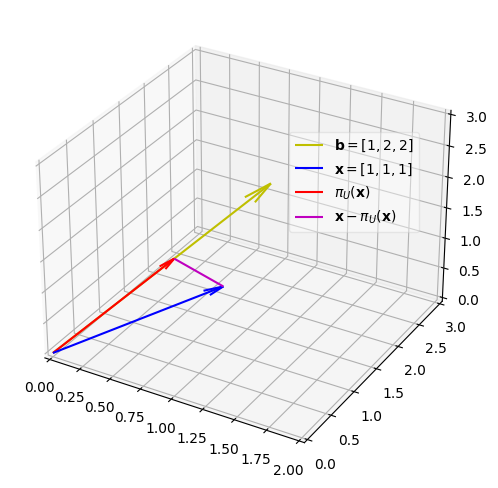

In [12]:
# Criando a figura e o eixo 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Adicionando os vetores ao gráfico
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='y', label='$\mathbf{b} = [1,2,2]$', arrow_length_ratio=0.1, linewidth=1.5)
ax.quiver(0, 0, 0, x[0], x[1], x[2], color='blue', label='$\mathbf{x} = [1,1,1]$', arrow_length_ratio=0.1, linewidth=1.5)
ax.quiver(0, 0, 0, P_pi_x[0], P_pi_x[1], P_pi_x[2], arrow_length_ratio=0.1, color='red', label='$\pi_U(\mathbf{x})$', linewidth=1.5)
ax.quiver(P_pi_x[0], P_pi_x[1], P_pi_x[2], x_dif_pi_x[0], x_dif_pi_x[1], x_dif_pi_x[2], color='m', label='$\mathbf{x} - \pi_U(\mathbf{x})$', arrow_length_ratio=0, linewidth=1.5)

# Configurando os limites dos eixos
ax.set_xlim([0, 2])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

# Adicionando uma legenda
ax.legend(bbox_to_anchor=(0.9, 0.75), framealpha=0.4)

plt.show()

Nota-se de forma geométrica que  $\textbf{x} - \pi_U(\textbf{x})$ é ortogonal ao vetor $\textbf{b}$ que gera o subespaço. Neste caso, como $\pi_U(\textbf{x})$ reside no subespaço definido por $\textbf{b}$, a projeção pode ser caracterizada como uma combinação linear de $\textbf{b}$ que define a base de $U$.

## **Projeção em Subespaços Gerais**

### **Exemplo 4**

Para $U=span[
\begin{bmatrix}
1 \\
1 \\
1 \\
\end{bmatrix},
\begin{bmatrix}
0 \\
1 \\
2 \\
\end{bmatrix}
]
\subseteq \mathbb{R}^3$ e
$
\textbf{x}=
\begin{bmatrix}
6 \\
0 \\
0 \\
\end{bmatrix}
\subseteq \mathbb{R}^3  
$
encontre os valores de $\lambda$, $\pi_U(\textbf{x})$ e  $\textbf{P}_{\pi}$.

Inicialmente, será verificado que o conjunto gerador de $U$ formam uma base, ou seja, os vetores devem ser linearmente independentes. Neste caso, é necessário demonstrar que a única combinação linear dos dois vetores resulta no vetor nulo

Dessa forma, supondo que existam escalares $a_1$ e $a_2$ tais que

$a_1
\times
\begin{bmatrix}
1 \\
1 \\
1 \\
\end{bmatrix}
+
a_2
\begin{bmatrix}
0\\
1 \\
2 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
\end{bmatrix}
\implies
\begin{bmatrix}
a_1 \\
a_1+a_2 \\
a_1+2a_2 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
\end{bmatrix}
$

Dessa forma, tem-se o seguinte sistema de equações:

$
\begin{cases}
 a_1 = 0 \\
 a_1 + a_2 = 0 \\
 a_1 + 2a_2 = 0
\end{cases}
$


In [14]:
# Definir as variáveis
a1, a2 = sp.symbols('a1 a2')

# Equações
eq1 = sp.Eq(a1, 0)
eq2 = sp.Eq(a1 + a2, 0)
eq3 = sp.Eq(a1 + 2*a2, 0)

# Resolvendo o sistema de equações
solution = sp.solve((eq1, eq2, eq3), (a1, a2))
solution

{a1: 0, a2: 0}

Dessa forma, a única solução para o sistema resulta no vetor nulo, e portanto, pode-se concluir que esses vetores são linearmente independentes.

Em seguida, os vetores base de $U$ são definidos como $B =
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2
\end{bmatrix}$, sendo calculada a matriz $B^\top B$ e o vetor $B^\top \textbf{x}$.

In [15]:
# Definindo a matriz B
B = np.array([[1, 0],
              [1, 1],
              [1, 2]])

# Calculando a transposta de B, B^T
B_T = B.transpose()

# Calculando o produto B^T B
B_T_B = np.dot(B_T, B)
B_T_B

array([[3, 3],
       [3, 5]])

Calculando $B^\top \textbf{x}$.

In [16]:
# Definindo o vetor x
x = np.array([6, 0, 0])

# Calculando o produto B^T x
B_T_x = np.dot(B_T, x)
B_T_x

array([6, 0])

Resolvendo a equação  $B^\top B \lambda = B^\top \textbf{x}$ para encontrar $\lambda$:

$
\begin{bmatrix}
3 & 3 \\
3 & 5
\end{bmatrix}
\begin{bmatrix}
\lambda_1 \\
\lambda_2
\end{bmatrix}
=
\begin{bmatrix}
3 \times \lambda_1 + 3 \times \lambda_1 \\
3 \times \lambda_2 + 5 \times \lambda_2
\end{bmatrix}
=
\begin{bmatrix}
6 \\
0
\end{bmatrix}
$

Dessa forma, temos o seguinte sistema de equações:

$
\begin{cases}
3 \lambda_1 + 3 \lambda_2 = 6 \\
3 \lambda_1 + 5 \lambda_2 = 0
\end{cases}
$

In [17]:
# Definir as variáveis
lambda1, lambda2 = sp.symbols('lambda1 lambda2')

# Definir as equações
eq1 = sp.Eq(3 * lambda1 + 3 * lambda2, 6)
eq2 = sp.Eq(3 * lambda1 + 5 * lambda2, 0)

# Resolver o sistema
solution = sp.solve((eq1, eq2), (lambda1, lambda2))
solution

{lambda1: 5, lambda2: -3}

Encontrando a projeção $\pi_U(\textbf{x})$ em $U$:

$
\pi_U(\textbf{x}) =
B \lambda =
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
1 & 2
\end{bmatrix}
\begin{bmatrix}
5  \\
-3    
\end{bmatrix}
$

In [18]:
# Definindo o vetor lambda
lambda_vector = np.array([solution[lambda1], solution[lambda2]]).transpose()

# Calculando B * lambda
P_pi_x = np.dot(B, lambda_vector)
P_pi_x

array([5, 2, -1], dtype=object)

O erro da projeção é a norma da diferença entre o vetor original e sua projeção em $U$, ou seja $\|\textbf{x} - \pi_U(\textbf{x})\|$.

* Calculando $\textbf{x} - \pi_U(\textbf{x})$:

In [19]:
x_sub_P_pi_x = x - P_pi_x
x_sub_P_pi_x

array([1, -2, 1], dtype=object)

 * Calculando $\|\textbf{x} - \pi_U(\textbf{x})\|$:

In [20]:
# Calculando a distância euclidiana
norma_x_sub_P_pi_x = np.linalg.norm(x_sub_P_pi_x.astype(float))
norma_x_sub_P_pi_x

2.449489742783178

Encontrando a matriz de projeção (para qualquer \textbf{x} $\in \mathbb{R}^3$) resolvendo $\textbf{P}_{\pi} \textbf{x} = \pi_U(\textbf{x}) = B(B^\top B)^{-1}B^\top$.

* Calculando $(B^\top B)^{-1}$.

In [21]:
# Calculando a inversa de B^T B
B_T_B_inv = np.linalg.inv(B_T_B)
B_T_B_inv

array([[ 0.83333333, -0.5       ],
       [-0.5       ,  0.5       ]])

* Calculando $B(B^\top B)^{-1}$.

In [22]:
# Calculando B B^T B inv
B_B_T_B_inv = np.dot(B, B_T_B_inv)
B_B_T_B_inv

array([[ 0.83333333, -0.5       ],
       [ 0.33333333,  0.        ],
       [-0.16666667,  0.5       ]])

* Calculando
$
\textbf{P}_{\pi} \textbf{x} =
B(B^\top B)^{-1}B^\top$.

In [23]:
# Calculando B B^T B inv B^T
B_B_T_B_inv_B_T = np.dot(B_B_T_B_inv, B_T)
B_B_T_B_inv_B_T

array([[ 0.83333333,  0.33333333, -0.16666667],
       [ 0.33333333,  0.33333333,  0.33333333],
       [-0.16666667,  0.33333333,  0.83333333]])

Para verificar o resultado da projeção, será mostrado que o vetor $\textbf{x} - \pi_U(\textbf{x})$ é ortogonal aos vetore base de $U$.

Pela condição de ortogonalidade, o resultado do produto interno de $\textbf{x} - \pi_U(\textbf{x})$ com cada vetor da base de $U$ deve ser zero. Considerando os cálculos anteriores, tem-se que $
\textbf{x} - \pi_U(\textbf{x}) =
\begin{bmatrix}
1 & -2 & 1
\end{bmatrix}^\top
$.

 * Calculando o produto interno do primeiro vetor da base de $U$.

$
\begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$

In [24]:
# Produto interno do primeiro vetor
np.dot(x_sub_P_pi_x, B.transpose()[0])

0

* Calculando o produto interno do segundo vetor da base de $U$.

$
\begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
2
\end{bmatrix}
$

In [25]:
# Produto interno do segundo vetor
np.dot(x_sub_P_pi_x, B.transpose()[1])

0

Observa-se que ambos os produtos internos são zero. Assim, o vetor
$
\textbf{x} - \pi_U(\textit{x}) =
\begin{bmatrix}
1 & -2 & 1
\end{bmatrix}^\top
$
é ortogonal a cada um dos vetores que compõem a base de
$U$, confirmando
$\textbf{x} - \pi_U(\textbf{x})$
é ortogonal a base dada.

### **Exemplo de Representação Geométrica**

A seguir apresenta-se uma visualização geométrica de $\pi_U(\textbf{x})$ em
$
U \subseteq \mathbb{R}^3  
$. Os vetores $b_1$ e $b_2$ formam a base do subespaço $U$, $\textbf{x}$ é o vetor considerado para a projeção e $\pi_U(\textbf{x})$ é a projeção ortogonal do vetor
$\textbf{x}$ no subespaço $U$. Observa-se que $\textbf{x} - \pi_U(\textbf{x})$ é a diferença entre $\textbf{x}$ e sua projeção $\pi_U(\textbf{x})$.

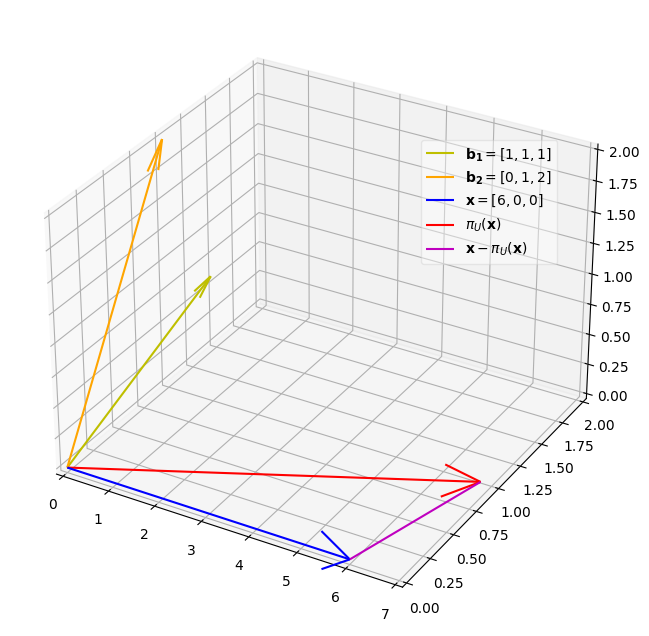

In [26]:
# Criando a figura e o eixo 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definindo os vetores
b1 = B.transpose()[0]
b2 = B.transpose()[1]

# Adicionando os vetores ao gráfico
ax.quiver(0, 0, 0, b1[0], b1[1], b1[2], color='y', label='$\mathbf{b_1} = [1,1,1]$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, b2[0], b2[1], b2[2], color='orange', label='$\mathbf{b_2} = [0,1,2]$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, x[0], x[1], x[2], color='b', label='$\mathbf{x} = [6,0,0]$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, P_pi_x[0], P_pi_x[1], P_pi_x[2], color='red', label='$\pi_U(\mathbf{x})$', arrow_length_ratio=0.1)
ax.quiver(P_pi_x[0], P_pi_x[1], P_pi_x[2], x_sub_P_pi_x[0], x_sub_P_pi_x[1], x_sub_P_pi_x[2], color='m', label='$\mathbf{x} - \pi_U(\mathbf{x})$', arrow_length_ratio=0)

# Configurando os limites dos eixos
ax.set_xlim([0, 7])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])

# Adicionando uma legenda
ax.legend(bbox_to_anchor=(0.9, 0.8), framealpha=0.4)

plt.show()

A representação de $\pi_U(\textbf{x})$ como uma linha que começa no vetor $\textbf{x}$ e termina sua respectiva projeção no plano evidencia a natureza geométrica da projeção ortogonal. No entanto, a perspectiva do gráfico anterior pode não evidenciar a ortogonalidade de $\textbf{x} -
 \pi_U(\textbf{x})$ com relação aos vetores $b_1$ e $b_2$ que formam a base do subespaço $U$. Neste caso, o gráfico a seguir apresenta uma visualização geométrica que evidencia a ortogonalidade de $\textbf{x} -
 \pi_U(\textbf{x})$ com relação aos vetores $b_1$ e $b_2$, conforme verificado pelos cálculos do produto escalar.

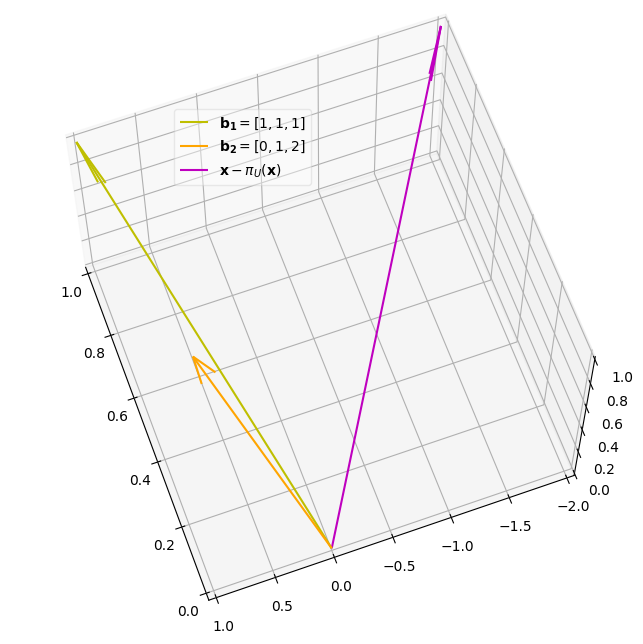

In [27]:
# Definindo os vetores
u1 = np.array([1, 1, 1])
x_sub_P_pi_x = np.array([1, -2, 1])

# Criando a figura e o eixo 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Adicionando os vetores ao gráfico
ax.quiver(0, 0, 0, b1[0], b1[1], b1[2], color='y', label='$\mathbf{b_1} = [1,1,1]$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, b2[0], b2[1], b2[2], color='orange', label='$\mathbf{b_2} = [0,1,2]$', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, x_sub_P_pi_x[0], x_sub_P_pi_x[1], x_sub_P_pi_x[2], color='m', label='$\mathbf{x} - \pi_U(\mathbf{x})$', arrow_length_ratio=0.1)

# Configurando os limites dos eixos
ax.set_xlim([0, 1])
ax.set_ylim([-2, 1])
ax.set_zlim([0, 1])

# Ajustando a visualização para evidenciar a ortogonalidade
ax.view_init(elev=65, azim=160)

# Adicionando uma legenda
ax.legend(bbox_to_anchor=(0.5, 0.85), framealpha=0.4)

# Mostrando o gráfico
plt.show()

Neste caso, nota-se que a representação geométrica desempenha um papel fundamental no estudo das projeções ortogonais, uma vez que oferece uma compreensão visual e intuitiva dos conceitos matemáticos.